In [1]:
#!/usr/bin/python 
%matplotlib inline
""" 
    Skeleton code for k-means clustering mini-project.
"""
import pickle
import numpy
import matplotlib.pyplot as plt
from feature_format import featureFormat, targetFeatureSplit

def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("final_project_dataset.pkl", "r") )
data_dict.pop("TOTAL", 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [28]:
import pandas as pd
# Stock option range
df = pd.DataFrame.from_dict(data_dict,orient='index')
stock = df["exercised_stock_options"]
print "The maximun value of exercised_stock_options is {}".format(stock[stock!='NaN'].max())
print "The minimun value of exercised_stock_options is {}".format(stock[stock!='NaN'].min())

The maximun value of exercised_stock_options is 34348384
The minimun value of exercised_stock_options is 3285


In [29]:
# Salary range
salary = df["salary"]
print "The maximun value of salary is {}".format(salary[salary!='NaN'].max())
print "The minimun value of salary is {}".format(salary[salary!='NaN'].min())

The maximun value of salary is 1111258
The minimun value of salary is 477


In [2]:
# Selecting two features
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )

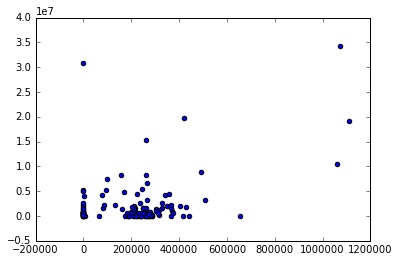

In [3]:
poi, finance_features = targetFeatureSplit(data)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )

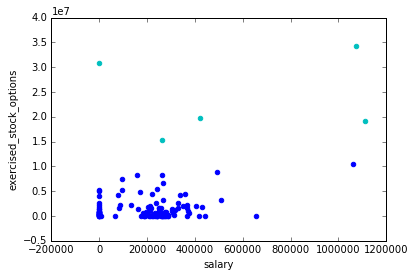

In [4]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=2)
pred = clf.fit_predict( finance_features )
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters_2features.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"

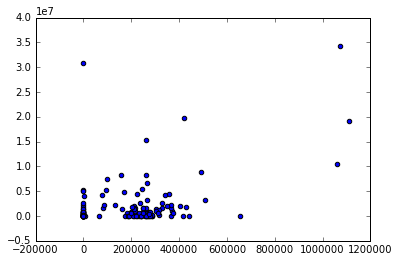

In [5]:
# Selecting three features
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit(data)

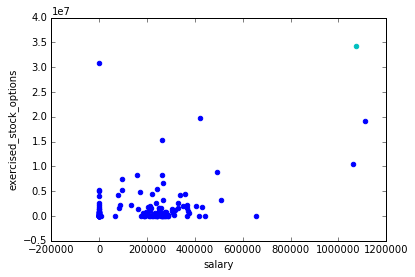

In [6]:
clf = KMeans(n_clusters=2)
pred = clf.fit_predict( finance_features )
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters_3features.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"